

 # classification_flowers_with_Data_augmetation

genral guidelines on Machine learning
- import necessary libraries
- import data and apply data processing
- apply augmentation and store it at location .
- build your model
- train your model inspect it 
- visulize your modle 
- test it 




In [ ]:
from __future__ import absolute_import, division,print_function,unicode_literals
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator as IDG

### Data Loading 
- download our dataset 
- store the archive 
- provide it path

### Data inspection
This dataset contain 5 types of flowers \
1.Rose \
2.Daisy \
3.Dandelion \
4.Sunflowers \
5.Tulips \
TODO:Create those labels


In [ ]:
classes=['roses','daisy','dandelion','sunflowers','tulips']


In [ ]:
_URL='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
zip_file=tf.keras.utils.get_file(origin=_URL,
                                 fname='flower_photos.tgz',
                                 extract=True)
#print(zip_file)
base_dir=os.path.join(os.path.dirname(zip_file),'flower_photos')
base_dir

228818944/228813984 [==============================] - 1s 0us/step


'/root/.keras/datasets/flower_photos'

In [ ]:
!rm -r /root/.keras/datasets/flower_photos/train

rm: cannot remove '/root/.keras/datasets/flower_photos/train': No such file or directory


The structure of directory is this
flower_photos
/diasy \
/dandelion \
/roses \
/sunflowers \
/tulips \
only this :>)
### Here is your problem
you only have labeled data but i don't have grouped trainig data and validation data.
so.let's write some code that will do this
# TODO
1.create trainig and validation dir \
2.each five folders  \
SInce ,we just apply the moving operations \
:-) fun to know there training numbers

In [ ]:
for cl in classes:
    img_path=os.path.join(base_dir,cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {}Images".format(cl,len(images)))
    train,  val =images[:round(len(images)*0.8)],images[round(len(images)*0.8):]
    
    for t in train:
        if not os.path.exists(os.path.join(base_dir,'train',cl)):
            os.makedirs(os.path.join(base_dir,'train',cl))
        shutil.move(t,os.path.join(base_dir,'train',cl))
        
    for v in val:
        if not os.path.exists(os.path.join(base_dir,'val',cl)):
            os.makedirs(os.path.join(base_dir,'val',cl))
        shutil.move(v,os.path.join(base_dir,'val',cl))

roses: 641Images
daisy: 633Images
dandelion: 898Images
sunflowers: 699Images
tulips: 799Images


In [ ]:
base_dir='/root/.keras/datasets/flower_photos'
val_cat=os.path.join(base_dir,'train','roses')
len_cat=len(os.listdir(val_cat))
val_tulips=os.path.join(base_dir,'train','tulips')
len_tulips=len(os.listdir(val_tulips))

In [ ]:
roses_len =len(os.listdir(val_cat))
roses_len

513

In [ ]:
#for convenient set up path for training and validation set
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
print(train_dir,val_dir)

/root/.keras/datasets/flower_photos/train /root/.keras/datasets/flower_photos/val


#Data Augmentation 
Remember overfitting genrally occure when 
we have small number of data set.\
Fix this problem by image augmentation.
Goal : At trainig time your modle never see one imagae twice.

use fucntion:ImagesDataGenerator class.it will  take of data set
.

Experiment with  various image transformation
1.Basic Image
2.set batch
3.IMage size
### TODO
set bach size \
image Size \
2.Apply random horiziontal flip \
use:flow_from_dir,target,shuffle and rescale the images by 255 and then apply random flip


In [ ]:
BATCH_SIZE=100
IMG_SHAPE= 150


In [ ]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(50,50))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
#Helpful linux commands , i'm in love with them ..
!ls /root/.keras/datasets/flower_photos/ -print

total 624
2640282 -rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
3303004 drwx------ 2 270850 5000  36864 Apr 18 03:58 roses/
2646097 drwx------ 2 270850 5000  36864 Apr 18 03:58 daisy/
2646098 drwx------ 2 270850 5000  53248 Apr 18 03:58 dandelion/
2646095 drwx------ 2 270850 5000  36864 Apr 18 03:58 sunflowers/
2646099 drwxr-xr-x 7      0    0   4096 Apr 18 03:58 train/
2646101 drwxr-xr-x 7      0    0   4096 Apr 18 03:58 val/
2646096 drwx------ 2 270850 5000  45056 Apr 18 03:58 tulips/


In [ ]:
img_gen=IDG(rescale=1./255,vertical_flip=True)
train_data_gen=img_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_SHAPE,IMG_SHAPE)
                                                  )


img_gen=IDG(rescale=1./255,zoom_range=0.2)
train_data_gen=img_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_SHAPE,IMG_SHAPE)
                                                  )


img_gen=IDG(rescale=1./255,rotation_range=30)
train_data_gen=img_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_SHAPE,IMG_SHAPE)
                                                   )


img_gen=IDG(rescale=1./255,shear_range=0.4)
train_data_gen=img_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_SHAPE,IMG_SHAPE)
                                                   )



image_gen=IDG(rescale=1./255,horizontal_flip=True,rotation_range=60,
             width_shift_range=0.2,height_shift_range=0.4,shear_range=0.3,
             zoom_range=0.4,fill_mode='reflect')
train_data_gen=img_gen.flow_from_directory(batch_size=int(BATCH_SIZE),
                                                        directory=train_dir,
                                                        shuffle=True,
                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                        class_mode='sparse')
val_image_gen=IDG(rescale=1./255,horizontal_flip=True,rotation_range=60,
             width_shift_range=0.2,height_shift_range=0.4,shear_range=0.3,
             zoom_range=0.4,fill_mode='nearest')
val_data_gen=val_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=val_dir,
                                                        shuffle=True,
                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                        class_mode='sparse')

Found 2935 images belonging to 5 classes.
Found 2935 images belonging to 5 classes.
Found 2935 images belonging to 5 classes.
Found 2935 images belonging to 5 classes.
Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


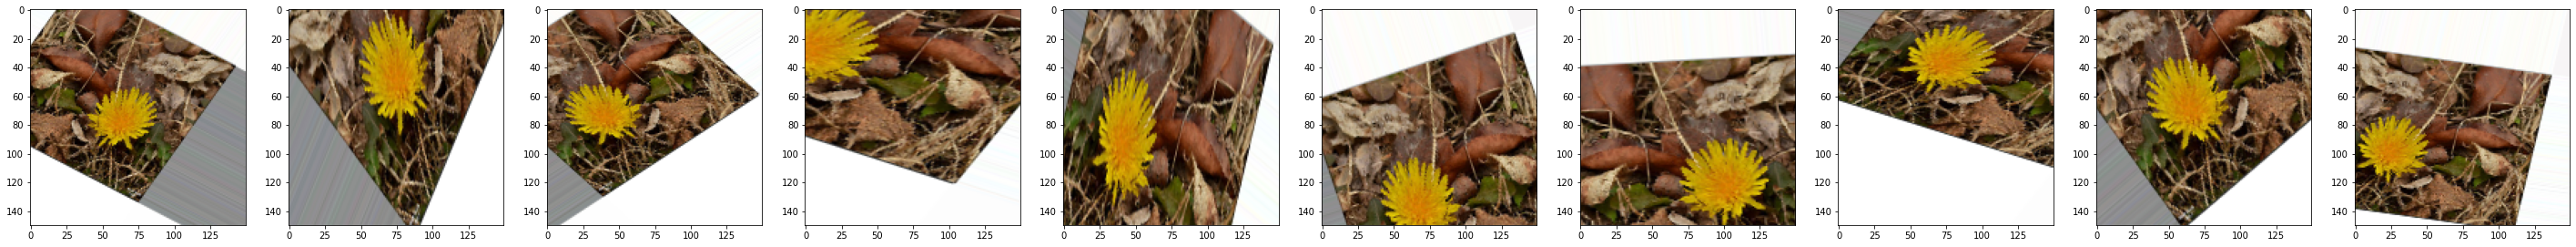

In [ ]:
val_img=[val_data_gen[0][0][0] for i in range(10)]
plotImages(val_img)

#put it all together
already done bro!

#TODO:Create the CNN
1.it contain a 3 convolution blocks \
2.each block conatain a Conv2D followed by max pooling layers. \
3.the first layer should have 16,32 and 64  filters with increasing index in  layers. \
4.All convolutinal  filter shold be 3*3 matrix. \
5.All max pool layers should have a pool  size(2,2) \
6.after convolution layer ,flatten layer should be used with 512 units. \
7.CNN should output class probabilities bsed on 5 classes use softmax funtion. \
8.All layer should use relu as activation function. \
9.Add dropout layer with prob as you want.


In [ ]:
#time for descrbing CNN
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3, padding='same',activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(64,3, padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,3, padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

      
    tf.keras.layers.Conv2D(256,3, padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Dropout(0.3), #to protect from overfitting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.3), #to protect from overfitting
    tf.keras.layers.Dense(5,activation='softmax')
])

TODO:Compile the model.\
1.compile  model using ADAM optimizer \
2.loss=sparse _cross_entropical \
3.metrics argument \
4.summary

In [ ]:
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

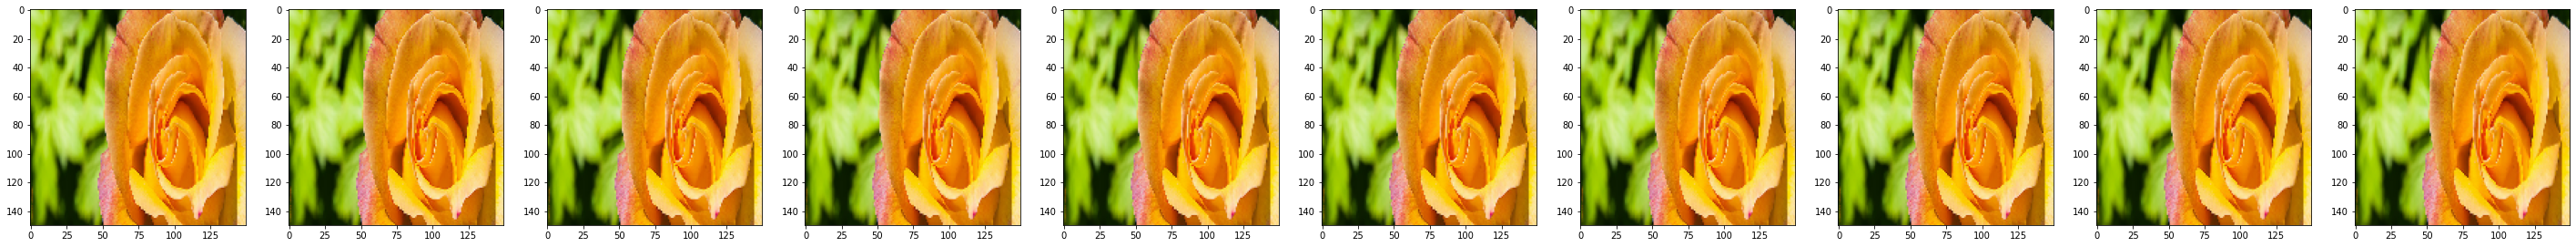

In [ ]:
data_vis=[train_data_gen[0][0][5] for i in range(10)]
plotImages(data_vis)

In [ ]:
#model_summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

TODO:Train the model \
1.train model using fit genrator method instead of fit ,why? \
2.epochs,history

In [ ]:
#let's tell our model to  train
BATCH=10
EPOCH=20
history=model.fit(train_data_gen,
                            steps_per_epoch=int(np.ceil(2000/float(BATCH))),
                            epochs=EPOCH,
                            
                            
                            validation_data=val_data_gen,
                            validation_steps=int(20)
                           )

Epoch 1/20
200/200 [==============================] - 60s 131ms/step - loss: 1.5030 - accuracy: 0.3127 - val_loss: 1.3376 - val_accuracy: 0.3850


!rm /root/.keras/datasets/flower_photos/val/roses/3751835302_d5a03f55e8_n.jpg

TODO: Experiment with different perameters \
1.addition of more convolutin filter \
2.changing activation function. \
3.change max_pooling layer \
4.differnt number of units  \
5.different dropout rates. \
6.perform  more image augmentation. \
### Note
if delta is larger between training accuracy and validation accuracy than model is overfitting .

In [ ]:
#visualization of result
val_acc=history.history['val_acc']
acc=history.history['acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epoch_range=range(EPOCH)
#visulaization with plotly
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label='Taining Accuracy')
plt.plot(epoch_range,val_acc,label='validation Accuracy')
plt.legend(loc='upper right')
plt.xlabel('steps per epochs')
plt.ylabel('Accuracy-->')
plt.title("Taining and validation set accuracy ")
plt.show()


plt.subplot(1,2,2)
plt.plot(epoch_range,acc,label='Trainig loss')
plt.plot(epoch_range,val_acc,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and evalutaion loss')
plt.xlabel('step_per_epoch')
plt.ylabel('loss --->')
plt.show()



KeyError: ignored

In [ ]:

epoch_range

### Model Saving & Restoring weights


In [ ]:
model.save_weights('./checkpoints/weights_CNN')
model.load_weights('./checkpoints/weights_CNN')


### Testing Models
1. Take a random example 

In [ ]:
import numpy as np
import PIL.Image as Image

img_url='http://4.bp.blogspot.com/-etfB9pzptac/UZ3gpitINKI/AAAAAAAAOns/TX9OOs1Mq4c/s1600/_nd3308644.jpg'
img_obj= tf.keras.utils.get_file('rose.jpg',img_url)
img_obj

In [ ]:
img_obj=Image.open(img_obj)
img_obj

In [ ]:
img_obj=Image.open(img_obj).resize((IMG_SHAPE,IMG_SHAPE))
img_obj

In [ ]:
img_obj=np.array(img_obj)/255.0
print(img_obj.shape)
img_obj

In [ ]:
result=model.predict(img_obj[np.newaxis])
result.shape

In [ ]:
predicted_class = np.argmax(result,axis=1)
predicted_class

In [ ]:
#but which class is class 4
labels=(train_data_gen.class_indices)
# inverse key value pait
labels = dict((v,k) for k,v in labels.items())
labels

In [ ]:
predictions=[labels[k] for k in predicted_class]
predictions

In [ ]:
#let's import pandas
import pandas as pd 
rat= ['rose']
results = pd.DataFrame({'object':rat,"Predictions":predictions})
results 

In [ ]:
#as mostly used format 
results.to_csv('result.csv',index=False)
df = pd.read_csv('result.csv')
df